
1. Realice un resumen estadístico de sus datos.
2. Entregue gráficos que acompañen los hallazgos encontrados en el punto
1.
3. Encuentre una relación o grafique las variables: op, ex y ag, además de
las categorías.
4. Determine cuántos k o clúster son adecuados para esta consulta.
5. Realice un modelo de k means con los cluster definidos en el punto 4.
6. Entregue una representación gráfica de los cluster.
7. A qué conclusión llega y cuál es su recomendación como experto.

In [10]:
# carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# warning
import warnings
warnings.filterwarnings('ignore')


In [4]:
# 1. Realice un resumen estadístico de sus datos.

df = pd.read_csv('clientes.csv', sep=',')
# resumen
df.describe()


,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


<Axes: xlabel='categoria'>

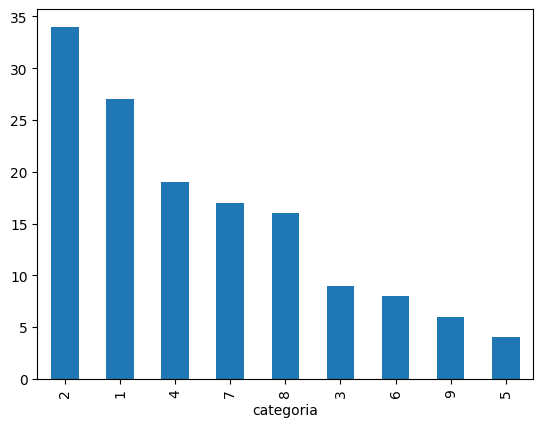

In [5]:
#2. Entregue gráficos que acompañen los hallazgos encontrados en el punto 1.

df['categoria'].value_counts().plot(kind='bar')


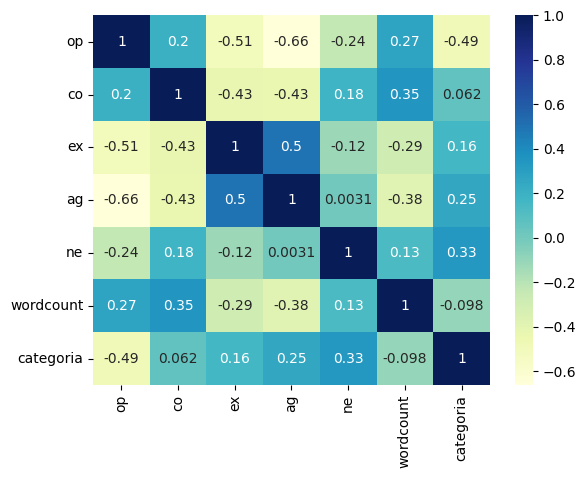

In [8]:


corr = df.corr()
corr

# graficar correlacion

sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

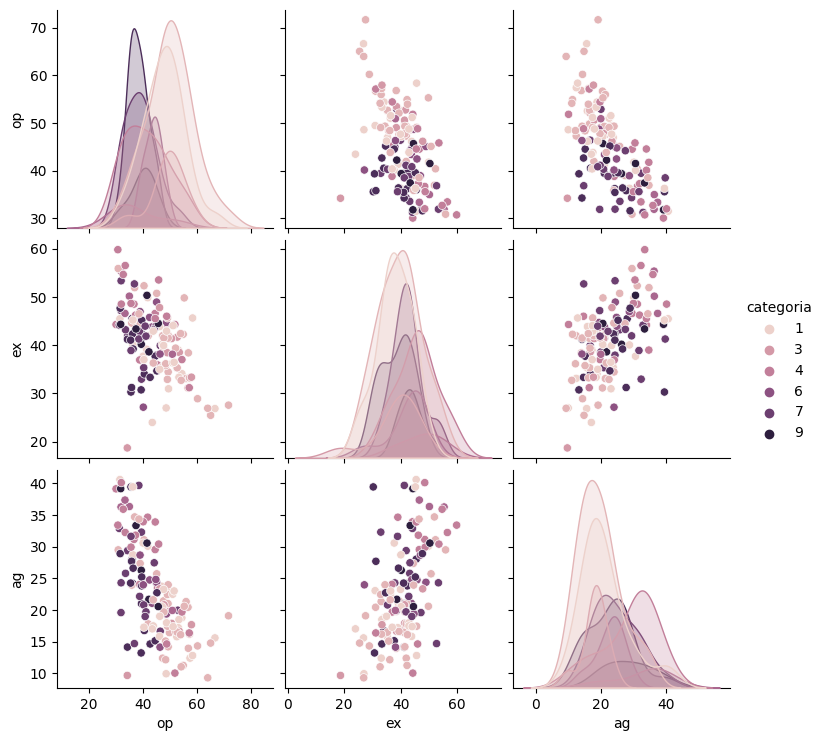

In [9]:
#3. Encuentre una relación o grafique las variables: op, ex y ag, además de las 
#categorías.

sns.pairplot(df, hue='categoria', vars=['op', 'ex', 'ag'])


In [11]:
# 4. Determine cuántos k o clúster son adecuados para esta consulta.


for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df)
    print("Para k=%s, el coeficiente de silueta es %s" % (k, silhouette_score(df, kmeans.labels_)))


Para k=2, el coeficiente de silueta es 0.45976410132823997
Para k=3, el coeficiente de silueta es 0.4672142257725146
Para k=4, el coeficiente de silueta es 0.370535215316357
Para k=5, el coeficiente de silueta es 0.35270124853751555
Para k=6, el coeficiente de silueta es 0.31372453404837847
Para k=7, el coeficiente de silueta es 0.3232680755198822
Para k=8, el coeficiente de silueta es 0.3229335236093664
Para k=9, el coeficiente de silueta es 0.2718443424427373


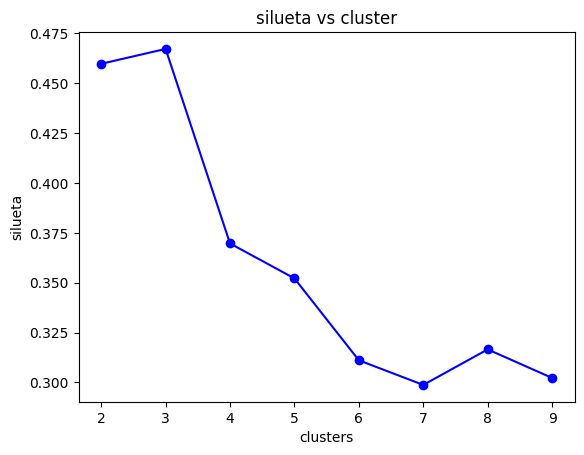

In [13]:
plt.plot(range(2, 10), [silhouette_score(df, KMeans(n_clusters=i).fit(df).labels_) for i in range(2, 10)], "bo-")
plt.title("silueta vs cluster")
plt.xlabel("clusters")
plt.ylabel("silueta")
plt.show()


In [14]:
#5. Realice un modelo de k means con los cluster definidos en el punto 4.
# definir el modelo
kmeans = KMeans(n_clusters=3, random_state=0)

# entrenar el modelo
kmeans.fit(df)

# predecir
pred = kmeans.predict(df)

# agregar columna 'cluster' al dataframe
df['cluster'] = pred

# mostrar dataframe
df.head()




,op,co,ex,ag,ne,wordcount,categoria,cluster
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,2
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,0
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,2
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,0
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,2


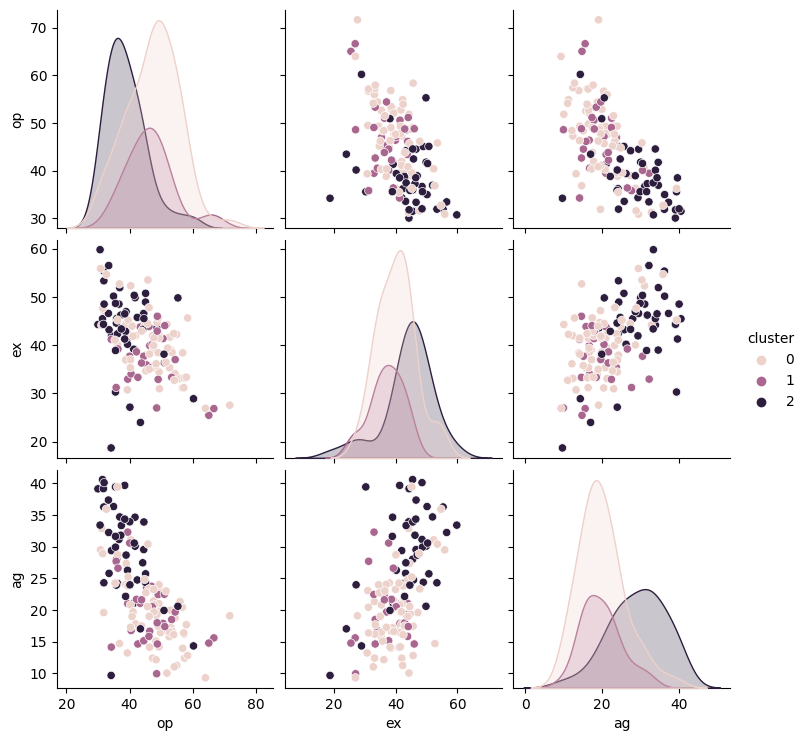

In [21]:
# 6. Entregue una representación gráfica de los cluster.
sns.pairplot(df, hue='cluster', vars=['op', 'ex', 'ag'])

In [ ]:
# 7. A qué conclusión llega y cuál es su recomendación como experto.



 R: Se puede observar que los clientes se pueden agrupar en 3 grupos, con personalidades extrovertidas, abiertos y amables; los extrovertidos, abiertos y no amables y los introvertidos, cerrados y no amables.

Se recomienda realizar campañas de marketing diferenciadas para cada grupo, diferenciando especialmente a los introvertidos de los extrovertidos
